In [11]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [6]:
human_detection = YOLO(r"C:\Users\hoang\OneDrive\Desktop\nghich_prj\Hackathon\Hack-CMC-Heineken\weights\v8m_human_detection\best.pt")

In [7]:
drinking_area_detection = YOLO(r"C:\Users\hoang\OneDrive\Desktop\nghich_prj\Hackathon\Hack-CMC-Heineken\weights\v8m_drinking_area_detection\best_area_crawl.pt")

In [8]:
beer_detection = YOLO(r"C:\Users\hoang\OneDrive\Desktop\nghich_prj\Hackathon\Hack-CMC-Heineken\weights\v8m_beer_detection\best.pt")

In [12]:
img_path = r"C:\Users\hoang\OneDrive\Desktop\nghich_prj\Hackathon\Hack-CMC-Heineken\data\FULL [Heineken Vietnam] Developer Resources\BZ1A0172.jpg"
area_results = drinking_area_detection(img_path)


image 1/1 C:\Users\hoang\OneDrive\Desktop\nghich_prj\Hackathon\Hack-CMC-Heineken\data\FULL [Heineken Vietnam] Developer Resources\BZ1A0172.jpg: 448x640 3 areas, 2199.7ms
Speed: 10.2ms preprocess, 2199.7ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


In [10]:
area_results = area_results[0]
area_boxes = area_results.boxes

In [17]:
human_detection.names

{0: '0', 1: '1', 2: '2'}

In [20]:
human_results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2.])
conf: tensor([0.9208, 0.6138])
data: tensor([[2.0414e+01, 3.8939e+01, 7.3945e+02, 1.2027e+03, 9.2075e-01, 2.0000e+00],
        [1.8655e+02, 1.0564e+02, 1.0330e+03, 2.4390e+03, 6.1383e-01, 2.0000e+00]])
id: None
is_track: False
orig_shape: (2440, 1034)
shape: torch.Size([2, 6])
xywh: tensor([[ 379.9327,  620.8043,  719.0377, 1163.7316],
        [ 609.7856, 1272.3364,  846.4705, 2333.3843]])
xywhn: tensor([[0.3674, 0.2544, 0.6954, 0.4769],
        [0.5897, 0.5214, 0.8186, 0.9563]])
xyxy: tensor([[  20.4138,   38.9385,  739.4515, 1202.6700],
        [ 186.5504,  105.6442, 1033.0209, 2439.0286]])
xyxyn: tensor([[0.0197, 0.0160, 0.7151, 0.4929],
        [0.1804, 0.0433, 0.9991, 0.9996]])

In [27]:
import torch

# Count the occurrences of each element
unique_elements, counts = torch.unique(a, return_counts=True)

# Display the results
for element, count in zip(unique_elements, counts):
    print(int(element))
    print(f"Element {element} appears {count} times")

1
Element 1 appears 2 times
2
Element 2 appears 2 times
3
Element 3 appears 1 times


In [28]:
def obj_counting(arr, names):
    unique_elements, counts = torch.unique(arr, return_counts=True)
    # Display the results
    for element, count in zip(unique_elements, counts):
        class_name = names[int(element)]
        print(f"Element {class_name} appears {count} times")

In [29]:
human_class_name = {0: "Other", 1: "Waiter", 2: "Guest"}

-------- ORIGIN ------------


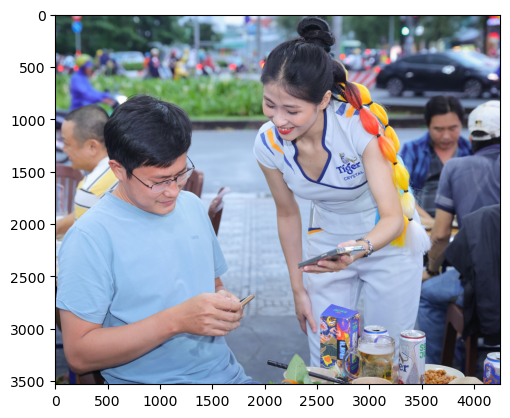

----Prediction----

0: 544x640 1 0, 2 1s, 3 2s, 2427.9ms
Speed: 12.9ms preprocess, 2427.9ms inference, 4.0ms postprocess per image at shape (1, 3, 544, 640)
Element Other appears 1 times
Element Waiter appears 2 times
Element Guest appears 3 times

0: 544x640 2 Tigers, 2292.3ms
Speed: 10.0ms preprocess, 2292.3ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 640)
Element Tiger appears 2 times
------------END------------
-------- ORIGIN ------------


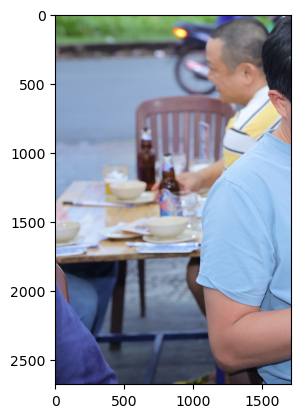

----Prediction----

0: 640x416 3 2s, 1411.0ms
Speed: 6.4ms preprocess, 1411.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 416)
Element Guest appears 3 times

0: 640x416 (no detections), 1528.3ms
Speed: 15.6ms preprocess, 1528.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 416)
------------END------------
-------- ORIGIN ------------


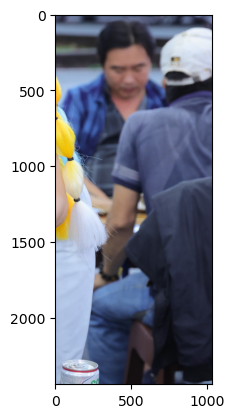

----Prediction----

0: 640x288 2 2s, 1443.2ms
Speed: 7.2ms preprocess, 1443.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 288)
Element Guest appears 2 times

0: 640x288 1 Heineken, 916.7ms
Speed: 10.9ms preprocess, 916.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 288)
Element Heineken appears 1 times
------------END------------


In [32]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for obj in area_boxes:
    xyxy = obj.xyxy.squeeze()
    x1, y1, x2, y2 = map(int, xyxy)
    drinking_area = img[y1: y2, x1: x2]
    print("-------- ORIGIN ------------")
    plt.imshow(drinking_area)
    plt.show()
    print("----Prediction----")
    human_results = human_detection(drinking_area)[0].boxes.cls
    obj_counting(human_results, human_class_name)
    beer_results = beer_detection(drinking_area)[0].boxes.cls
    obj_counting(beer_results, beer_detection.names)
    print("------------END------------")